# Understanding Over & Underfitting
## Predicting Boston Housing Prices

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#regressions
import sklearn as sk
from sklearn.linear_model import LinearRegression
from scipy import stats

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns


## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [2]:
df = pd.read_csv("../data/boston_data.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [4]:
# Your code here
# look at data
df.info()
# no NANs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [5]:
df.head()
# we see form this that the variable "chas" is a dummy variable with 0,1 (depending how close it is to the river)
# this HAS to be considered before we continue
# we will be doing a regression - so we should keep chas, however when passing the z score "cleaning" we should drop it (to not remove all 1s)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [6]:
chas = df[["chas"]]
chas.head()

,chas
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [7]:
# removing outliers
df_clean = df.drop("chas", axis=1)

df_clean= df_clean[(np.abs(stats.zscore(df_clean))<3).all(axis=1)]
# this funciton will remove all observations that have a z score greater than 3, this removes our outliers 
df_clean.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [8]:
df_clean.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2.450686,7.226744,11.111017,0.554299,6.258157,68.745058,3.754371,9.026163,395.613372,18.472384,372.805756,12.605669,21.870349
std,4.615743,15.207775,6.614872,0.115187,0.569417,27.481065,1.862511,8.305530,164.333352,2.043084,56.255129,6.433283,7.049946
min,0.006320,0.000000,1.250000,0.400000,4.368000,2.900000,1.316300,1.000000,188.000000,13.000000,81.330000,1.980000,5.600000
25%,0.086420,0.000000,5.860000,0.459500,5.890500,47.900000,2.197850,4.000000,279.000000,17.400000,378.000000,7.537500,17.800000
50%,0.223505,0.000000,8.560000,0.524000,6.215500,74.950000,3.346000,5.000000,311.000000,18.850000,392.110000,11.395000,21.400000
75%,2.447392,0.000000,18.100000,0.614000,6.563500,94.025000,4.978850,8.000000,437.000000,20.200000,396.352500,16.312500,24.700000
max,25.940600,75.000000,27.740000,0.871000,8.266000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,48.300000


In [9]:
# merge chas back in, right df = df_clean, left join will add ONLY the chas values that are allready on the df_clean 
# DONT RUN MERGE TWICE; IT WILL GIVE YOU CHAS X and CHAS Y THE SECOND TIME YOU RUN IT 
#df_clean = df_clean.merge(chas, how="left", left_index=True, right_index=True)
df_clean.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,chas
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7,0.0
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6,0.0
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3,0.0
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4,0.0
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5,0.0


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 403
Data columns (total 14 columns):
crim       344 non-null float64
zn         344 non-null float64
indus      344 non-null float64
nox        344 non-null float64
rm         344 non-null float64
age        344 non-null float64
dis        344 non-null float64
rad        344 non-null float64
tax        344 non-null float64
ptratio    344 non-null float64
black      344 non-null float64
lstat      344 non-null float64
medv       344 non-null float64
chas       344 non-null float64
dtypes: float64(14)
memory usage: 50.3 KB


### Next, we want to explore the data. Pick several variables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

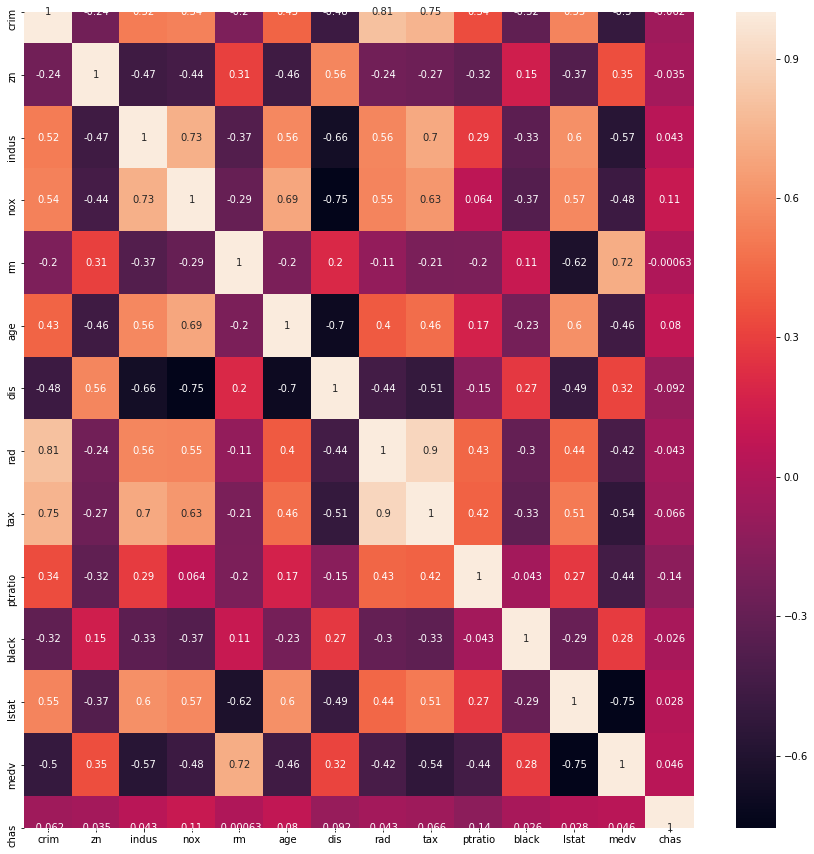

In [32]:
# check for correaltions 
plt.figure(figsize=(15,15))
sns.heatmap(df_clean.corr(), annot=True)

In [27]:
# check for multi-colinearity first to remove some dimensions

from statsmodels.stats import outliers_influence
from statsmodels.tools.tools import add_constant

X = add_constant(df_clean)

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

# all variables with a score higher than 4/5 (general standard) are typically removed

const      781.992243
crim         3.652807
zn           1.808369
indus        3.472857
nox          4.197093
rm           2.926754
age          2.927891
dis          3.661076
rad          8.550213
tax          8.796591
ptratio      1.880130
black        1.236763
lstat        3.559506
medv         4.840440
chas         1.066729
dtype: float64


In [33]:
# we can see that rad and tax are colinear, tax has a higher realtionship to our target variable, so we leave it in
df_clean.drop("rad", axis=1, inplace=True)

In [34]:
X = add_constant(df_clean)

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

# all colinearity looks ok now, we keep this DF

const      709.526852
crim         2.766775
zn           1.787083
indus        3.358514
nox          4.110645
rm           2.925783
age          2.927276
dis          3.590256
tax          3.946747
ptratio      1.786777
black        1.236501
lstat        3.556383
medv         4.609621
chas         1.056321
dtype: float64


In [36]:
# data relationship visualisation
# added regression plot
# a good way to check the relationships IF we have little dimensionality
"""f = sns.PairGrid(df_clean)
f = f.map_upper(sns.regplot, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})"""

"f = sns.PairGrid(df_clean)\nf = f.map_upper(sns.regplot, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})"

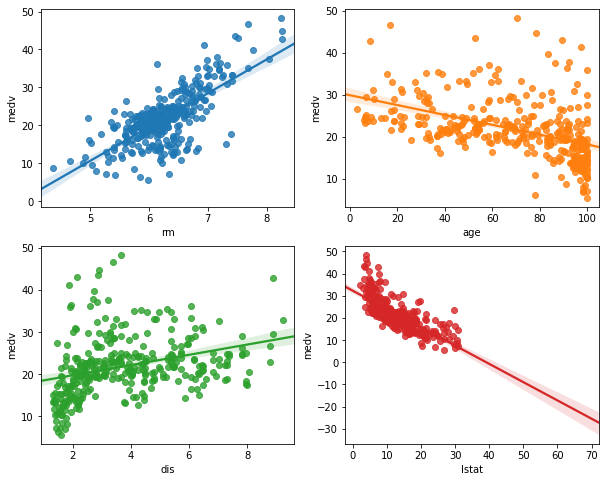

In [38]:
# we will try taking only "MEDV"
# from heatmap we see corr btw target and rm, lstat
# we do quick plot
f, axes = plt.subplots(2, 2)
f.set_size_inches(10, 8)
sns.regplot(x="rm", y="medv", data=df_clean, ax=axes[0, 0])
sns.regplot(x="age", y="medv", data=df_clean, ax=axes[0, 1])
sns.regplot(x="dis", y="medv", data=df_clean, ax=axes[1, 0])
sns.regplot(x="lstat", y="medv", data=df_clean, ax=axes[1, 1])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

#### meaning of graphs
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

#### conclusiond of graphs:
- more roooms = higher value
- the older the appartement unit, the pricier the house
- when the distance to employment centres is greater, so it the value
- the lower the % of low status, the higher the value





### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

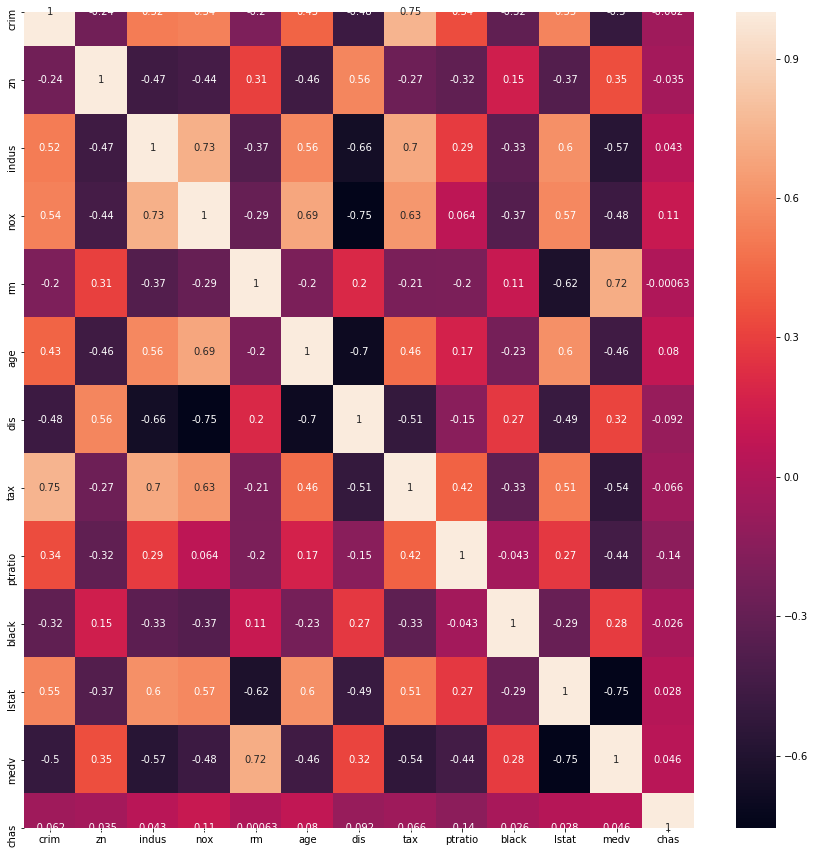

In [39]:
# Your response here
plt.figure(figsize=(15,15))
sns.heatmap(df_clean.corr(), annot=True)

# we choose not to remove more dimensitons AT THE MOMENT, as both correlation and colinearity are under our thresholds. 


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [45]:
# Your code here
df_clean.medv.describe()

count    344.000000
mean      21.870349
std        7.049946
min        5.600000
25%       17.800000
50%       21.400000
75%       24.700000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [48]:
from sklearn.metrics import r2_score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

>shuffle is carried out by the formula as we are randomising when chooseing test/train

<div class="alert alert-block alert-info">
 as chas is allready a dummy no need to change categorical variable - THIS IS IMPORTANT !
</div>    

> make sure to change the test size to your wanted model


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# split data
X = df_clean.drop("medv", axis=1)
y = df_clean.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [61]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

rf_model_2 = RandomForestRegressor(max_depth=2)
rf_model_4 = RandomForestRegressor(max_depth=4)
rf_model_6 = RandomForestRegressor(max_depth=6)
rf_model_8 = RandomForestRegressor(max_depth=8)
rf_model_10 = RandomForestRegressor(max_depth=10)

lst = [rf_model_2, rf_model_4, rf_model_6, rf_model_8, rf_model_10]

In [65]:
for i in lst:
    i.fit(X_train, y_train)

C:\Users\fabia hnt\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fabia hnt\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fabia hnt\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fabia hnt\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

In [79]:
pred_test_lst = []
for i in lst:
    pred_test_lst.append(i.predict(X_test))
print (pred_test_lst)

[array([21.60890159, 20.71776815, 20.71776815, 25.95572267, 21.60890159,
       15.14358861, 16.21610924, 22.43570901, 29.76907664, 20.71776815,
       18.13850208, 19.75634758, 19.81254054, 35.67197326, 19.75634758,
       25.95572267, 20.71776815, 20.71776815, 25.95572267, 20.71776815,
       20.71776815, 26.8468561 , 19.75634758, 15.08739565, 15.14358861,
       22.43570901, 20.71776815, 29.76907664, 22.71541031, 25.95572267,
       19.75634758, 20.71776815, 13.46955015, 13.46955015, 19.75634758,
       20.71776815, 20.71776815, 26.8468561 , 35.67197326, 25.95572267,
       25.95572267, 29.76907664, 20.30711887, 29.76907664, 13.46955015,
       19.75634758, 19.75634758, 19.75634758, 36.83079195, 25.95572267,
       18.13850208, 21.82427688, 25.95572267, 20.71776815, 35.67197326,
       20.30711887, 20.71776815, 20.30711887, 18.13850208, 26.8468561 ,
       26.8468561 , 19.75634758, 26.8468561 , 20.31371654, 25.95572267,
       13.46955015, 36.83079195, 22.43570901, 18.13850208]), ar

In [80]:
for i in pred_test_lst:
    print(r2_score(y_test, i))

0.6703512471668895
0.7720548414417716
0.7813277118570638
0.809831609892308
0.7893225411629665


Now, plot the score for each tree on the training set and on the testing set.

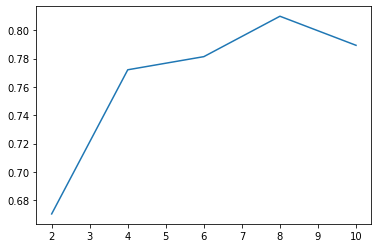

In [86]:
# Produce a plot with the score for the testing and training for the different max depths
plot_data = [0.6703512471668895, 0.7720548414417716, 0.7813277118570638, 0.809831609892308, 0.7893225411629665]
lst = [2,4,6,8,10]
plt.plot(lst, plot_data)


What do these results tell you about the effect of the depth of the trees on the performance of the model?

`answers:`What we can say from the graph above is that, the deeper the tree is, or the so called max_depth hyperparameter, the R2 score better is. However, even if we have a huge improvement step at the very beginning from 2 to 4, the slope then is lower for other cases. 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

`Answers:`

When the model has a maximum depth of 1, the model suffers from high bias. On the other way around, when the model is trained with a maximum depth of 10, the model has a low bias but then has a greater variance. This is what we callled the bias-variance tradeoff. 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

`Answers:`

There is not a unique answer for this question. From the Figure above we can say that the slopes changes and tends to flatten at 6, but then at max_depth = 8, the performance of the algorithm improves again and reaches the maximum. Hence, the max_depth parameter I would choose would be 8. 

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

- How relevant today is data that was collected from 1978?

Having historical data is quite useful for us to apply some stats inference and see the evolution of prices and other variables in terms of housing. However, maybe there are some features that were not important in 1978 and right now they are. 


- Are the features present in the data sufficient to describe a home?

I would personally add more features in terms of pollution, or if the house has been rebuilt of remodelled at some point of time. Also, I would add other features such as bathrooms and garden or parking. 


- Is the model robust enough to make consistent predictions?

I would say yes, since the model reaches an stable value of R2 when max_depth = 8 and the R2 value is quite high in all the cases. Hence, we could say that the model is robust enough to make consistent predictions. 


- Would data collected in an urban city like Boston be applicable in a rural city?

Not at all. Each data belongs to the city or location that it belongs. It is so difficult to take data from persons, cities and prices that can be considered general enough  to be applied in other environments, such as rural cities. 

A rural city is not likely to have the sames problems as Boston in terms of available squared meters to build up, or the price for each room, as well as pollution values around the city. For this reason, the data is not available to be applied to a city like Boston. 
